## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

## Loading Dataset

In [2]:
data = pd.read_csv("car data.csv")

In [3]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
273,jazz,2010,2.25,7.50,61203,Petrol,Dealer,Manual,0
138,Honda CB Hornet 160R,2016,0.60,0.87,15000,Petrol,Individual,Manual,0
270,city,2011,4.10,10.00,69341,Petrol,Dealer,Manual,0
226,grand i10,2015,5.25,5.70,24678,Petrol,Dealer,Manual,0


## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.duplicated().sum()

2

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


1] We have data from year 2003 to 2018

2] lowest selling price for a car was 0.1 and highest was 35 

#### Descriptive Analysis 

In [8]:
highest_selling_car = data[data['Selling_Price'] == data['Selling_Price'].max()]
highest_selling_car_name = highest_selling_car['Car_Name'].values[0]
highest_selling_car_price =  highest_selling_car['Selling_Price'].values[0]
print('Name of car with highest sold price :' ,highest_selling_car_name)
print('Price of car :' ,highest_selling_car_price)

Name of car with highest sold price : land cruiser
Price of car : 35.0


In [9]:
lowest_selling_car = data[data['Selling_Price'] == data['Selling_Price'].min()]
lowest_selling_car_name = lowest_selling_car['Car_Name'].values[0]
lowest_selling_car_price =  lowest_selling_car['Selling_Price'].values[0]
print('Name of car with lowest sold price :' ,lowest_selling_car_name)
print('Price of car :' ,lowest_selling_car_price)

Name of car with lowest sold price : Bajaj Pulsar 150
Price of car : 0.1


#### Univariate Analysis 

In [10]:
def distribution_plot(data):
    col = data.select_dtypes(include = ['int','float']).columns
    plt.figure(figsize=(15,12))
    for i,cols in enumerate(col,1):
        plt.subplot(2,3,i)
        sns.histplot(data[cols],kde = True)
        plt.title('Distribution of '+ cols)
        
    plt.tight_layout()
    plt.show()

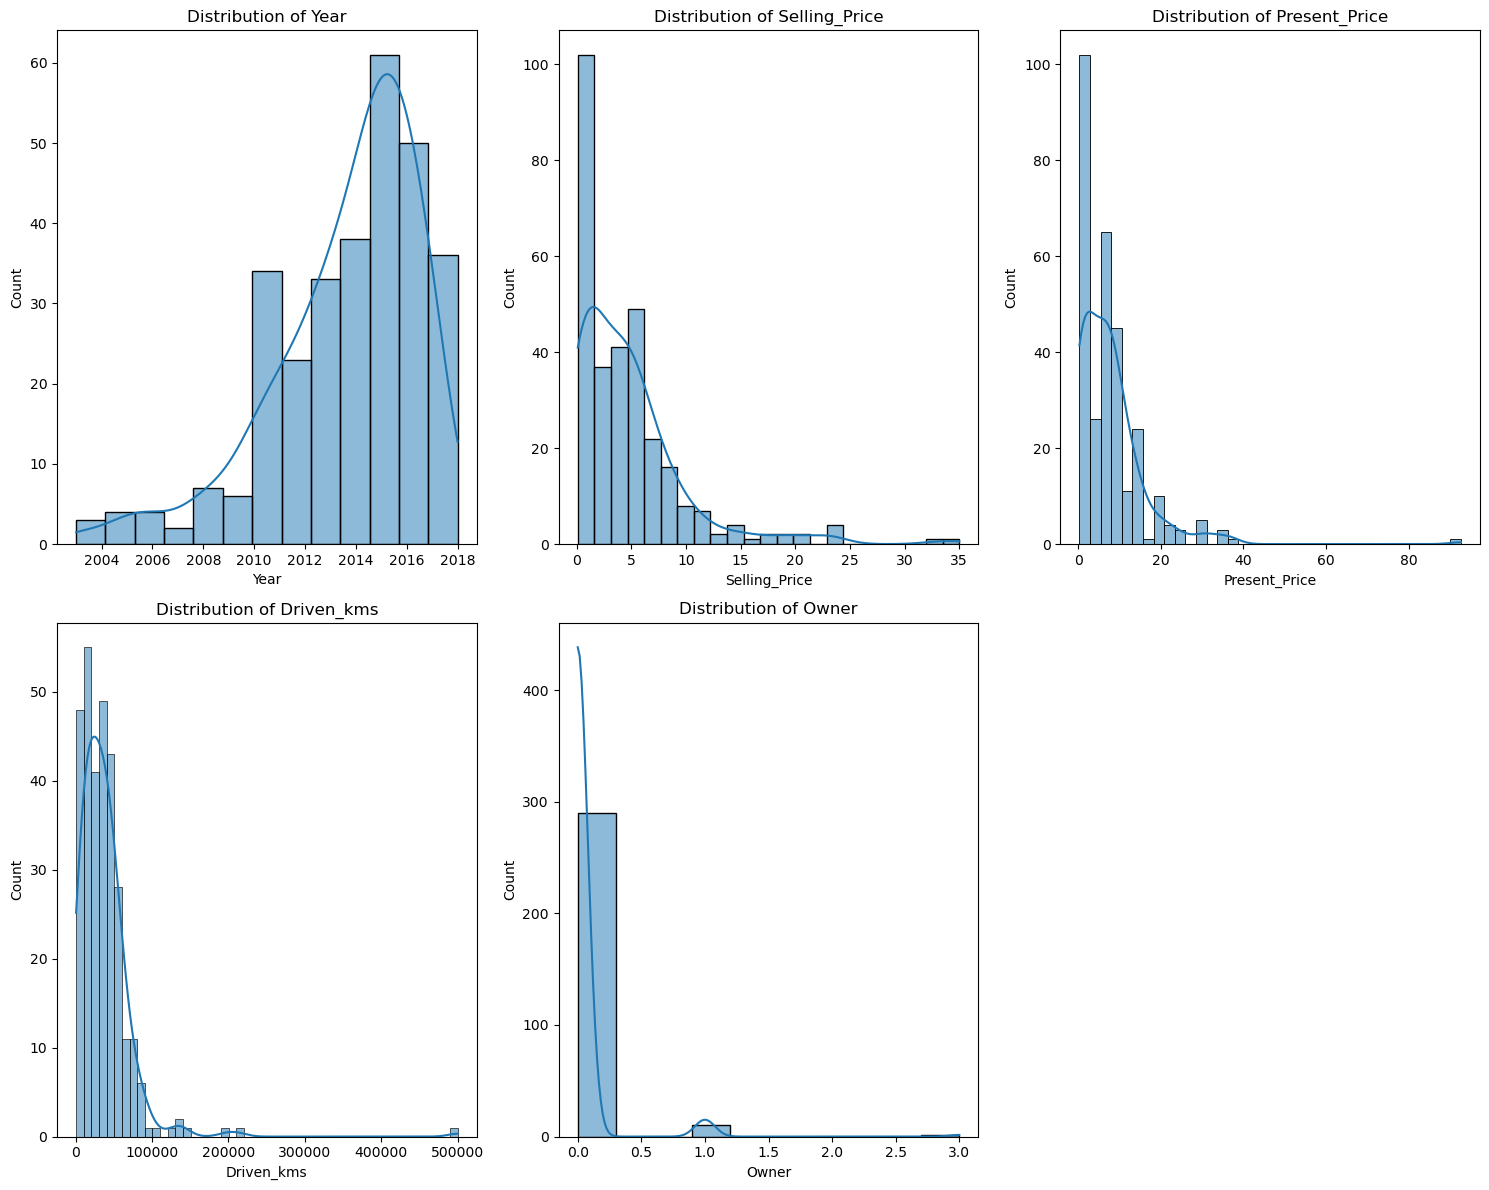

In [11]:
distribution_plot(data)

1] Year is right skewed means more number of car has been sold in recent years. In year 2015 the most number of cars have been sold while in 2007 less number of cars have been sold

2] selling price column is left skewed which indicates most of the cars are sold at low price and same goes with present price i.e their present value is also low

In [12]:
def categorical_analysis(data):
    cat_col = data.select_dtypes(include = ['object']).columns[1:]
    plt.figure(figsize=(15,12))
    for i , col in enumerate(cat_col,1):
        plt.subplot(2,len(cat_col),i)
        sns.countplot(x=col,data=data)
        plt.title('Number of ' + col)
    plt.tight_layout()
    plt.show()

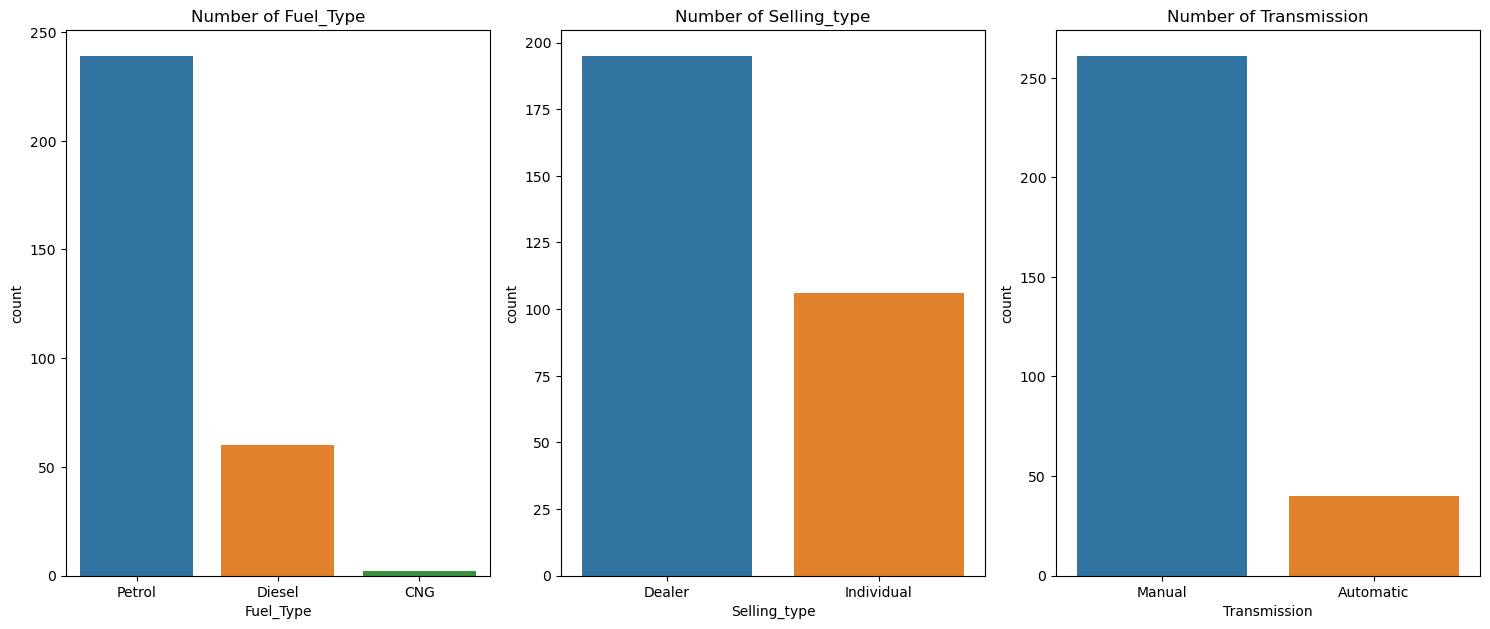

In [13]:
categorical_analysis(data)

1] Mostly the car sold are petrol car, while the car with manual transmission are mostly preferred by buyers and Dealer have sold highest number of cars as compared to individual.


2] By looking at values there are few distinct values so we can convert them into numerical column using One hot encoding

#### Bivariate Analysis

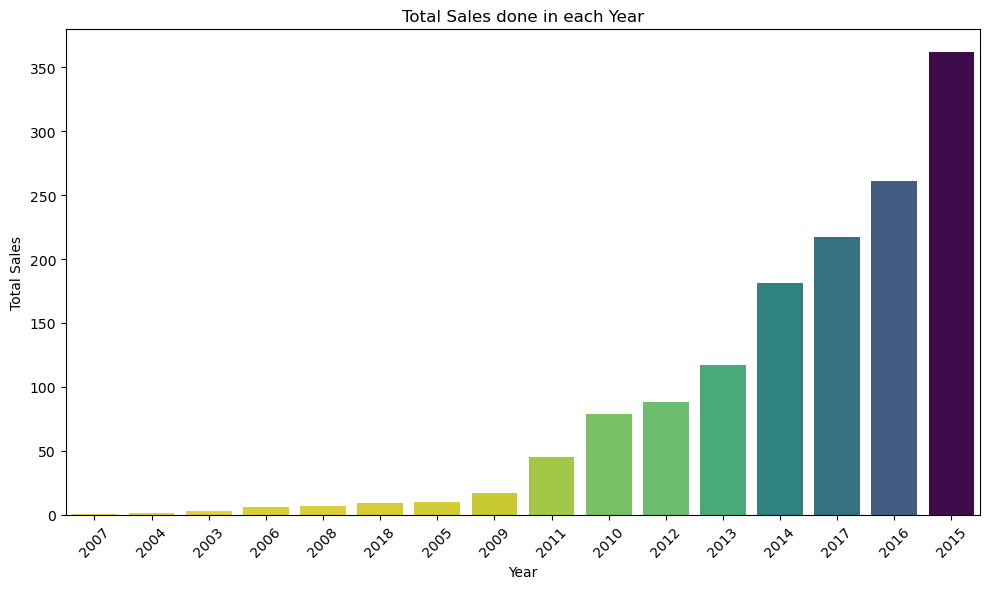

In [14]:
year_lowest_sale = data.groupby('Year')['Selling_Price'].sum().sort_values()

colors = plt.cm.viridis_r(year_lowest_sale.values / max(year_lowest_sale.values))

plt.figure(figsize=(10, 6))
sns.barplot(x=year_lowest_sale.index, y=year_lowest_sale.values,order =year_lowest_sale.index,palette = colors )
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales done in each Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


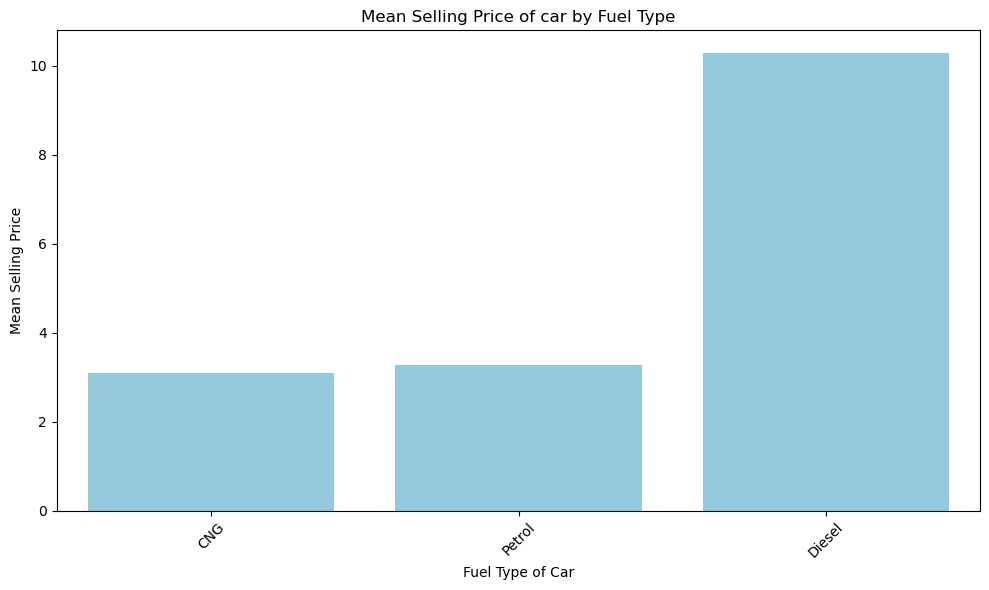

In [15]:
fuel_type_price = data.groupby('Fuel_Type')['Selling_Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_type_price.index, y=fuel_type_price.values, color='skyblue')
plt.xlabel('Fuel Type of Car')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price of car by Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


By looking at this we can say that the Selling price of Diesel car is much higher as compared to Petrol or CNG car i.e Diesel car are sold at much higher price than that of Petrol or CNG car.

In [16]:
p = data[data['Fuel_Type']== 'Diesel' ]
print('total sales from diesel cars :',p['Selling_Price'].sum())
print('no.of entries in Diesel car are very less :' ,len(p))

print('-----------------------------------------------------------------------------------------------------------')

q = data[data['Fuel_Type']== 'Petrol' ]
print('total sales from Petrol cars are very less as compared to no.of cars sold :',q['Selling_Price'].sum())
print('no.of entries in Petrol car are very high :' ,len(q))



total sales from diesel cars : 616.71
no.of entries in Diesel car are very less : 60
-----------------------------------------------------------------------------------------------------------
total sales from Petrol cars are very less as compared to no.of cars sold : 780.14
no.of entries in Petrol car are very high : 239


it's a proof that price of diesel car are higher than petrol car

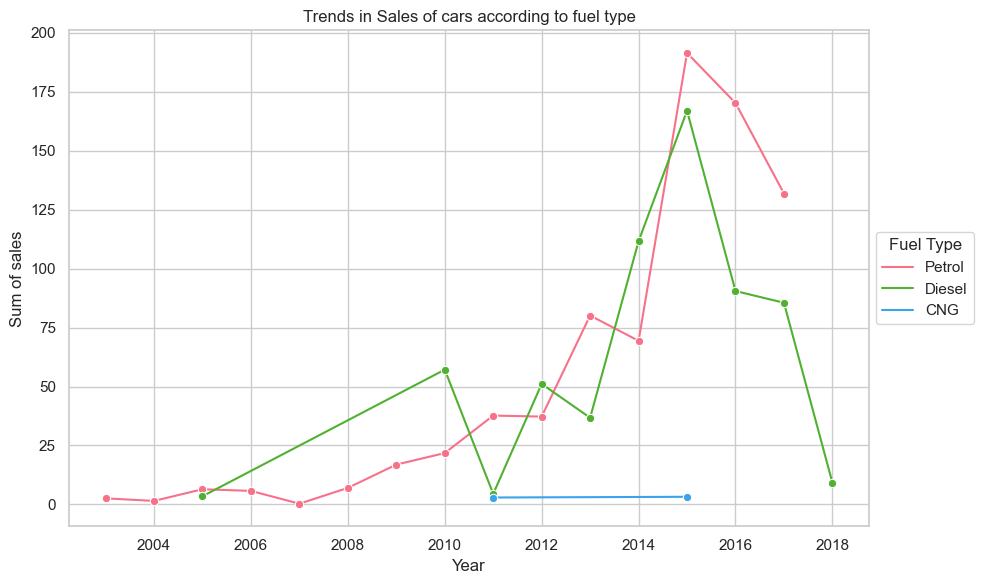

In [17]:
trend = data.groupby(['Year','Fuel_Type'])['Selling_Price'].sum()
years = trend.index.get_level_values('Year')
fuel_type = trend.index.get_level_values('Fuel_Type')


trend_reset = trend.reset_index()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  
palette = sns.color_palette("husl", len(trend_reset['Fuel_Type'].unique()))
#sns.lineplot(x=years,y=trend.values,hue=fuel_type)

sns.lineplot(data=trend_reset, x='Year', y='Selling_Price', hue='Fuel_Type', palette=palette, marker='o')


plt.xlabel('Year')
plt.ylabel('Sum of sales')
plt.title('Trends in Sales of cars according to fuel type')


plt.legend(title='Fuel Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

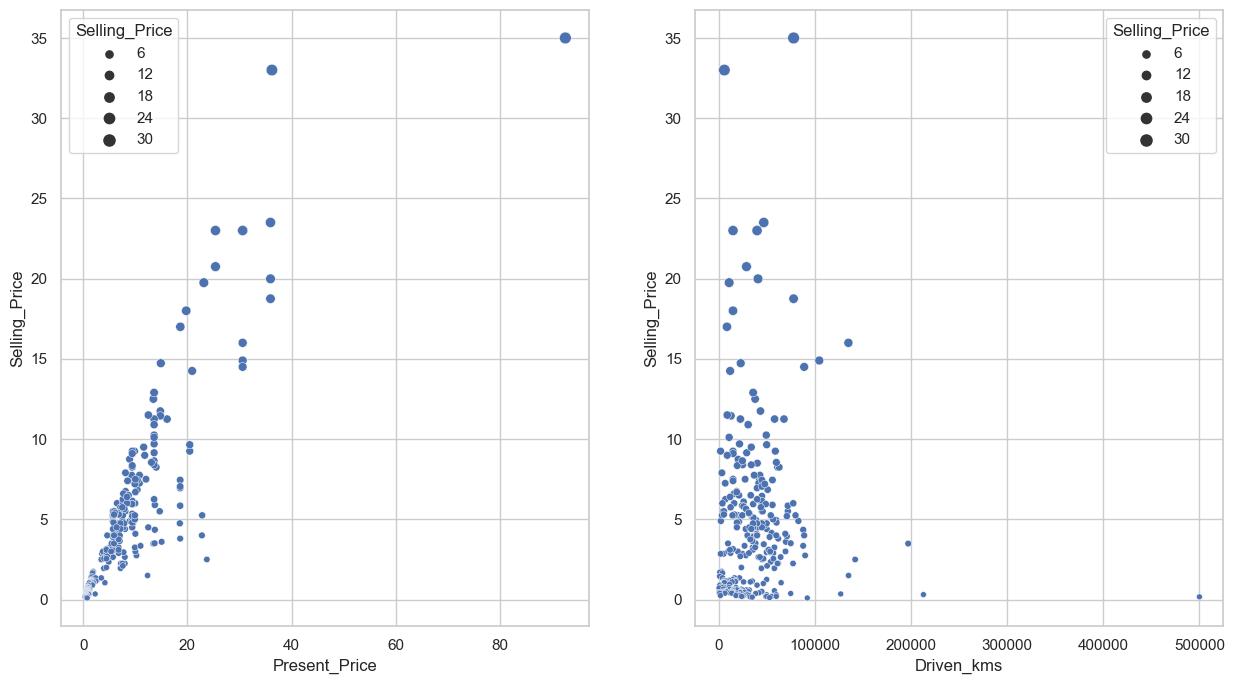

In [18]:
rel_col = ['Present_Price','Driven_kms']
fig,ax = plt.subplots(1,2,figsize=(15,8))
cols_index = 0

for i in range(1):
        for j in range (2):
            sns.scatterplot(x=data[rel_col[cols_index]],y=data['Selling_Price'],ax=ax[j],size=data['Selling_Price'])
           

            cols_index +=1

plt.show()


1] Here we can notice Present_Price have Positive corelation with target variable which is Selling Price, so it's a imp feature for us.

2] Another plot clearly says that as the Driven Kms of car increases the selling Price of car decreases.

3] Also there are 2 data points i.e above 30 in data whose behaviour is different from others so we have to remove them.

## Data Preprocessing

#### 1] Outlier treatment

In [19]:
data.drop(data[data['Selling_Price'] >= 30].index ,inplace=True)

#### 2] Data encoding 

In [20]:
fuel_type = pd.get_dummies(data['Fuel_Type'])
data['Is_petrol'] = fuel_type['Petrol']
data['Is_diesel'] = fuel_type['Diesel']

In [21]:
fuel_type

,CNG,Diesel,Petrol
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,True,False
...,...,...,...
296,False,True,False
297,False,False,True
298,False,False,True
299,False,True,False


In [22]:
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)


data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [23]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Is_petrol,Is_diesel
0,ritz,2014,3.35,5.59,27000,Petrol,0,0,0,True,False
1,sx4,2013,4.75,9.54,43000,Diesel,0,0,0,False,True
2,ciaz,2017,7.25,9.85,6900,Petrol,0,0,0,True,False
3,wagon r,2011,2.85,4.15,5200,Petrol,0,0,0,True,False
4,swift,2014,4.60,6.87,42450,Diesel,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,0,0,0,False,True
297,brio,2015,4.00,5.90,60000,Petrol,0,0,0,True,False
298,city,2009,3.35,11.00,87934,Petrol,0,0,0,True,False
299,city,2017,11.50,12.50,9000,Diesel,0,0,0,False,True


In [24]:
data.drop(data.select_dtypes(include=['object']).columns,axis=1,inplace=True)

#### 3] Spliting data 

In [25]:
feature = data.drop(['Selling_Price'],axis=1)
target = data['Selling_Price']

In [26]:
feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size=0.2,random_state=11)

####  4] Model Building

In [27]:
lr = LinearRegression()
lr.fit(feature_train,target_train)
y_pred = lr.predict(feature_test)

In [28]:

mse = mean_squared_error(target_test, y_pred)
r2 = r2_score(target_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 2.71
R-squared (R2): 0.86


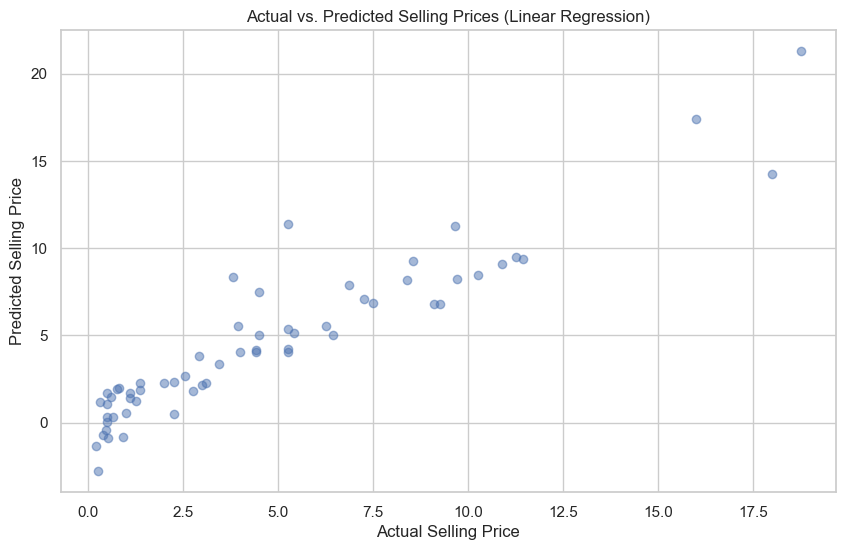

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()


In [30]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(feature_train,target_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(feature_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(target_test, rf_Y_pred)
rf_r2 = r2_score(target_test, rf_Y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")


Random Forest Mean Squared Error (MSE): 0.52
Random Forest R-squared (R2): 0.97


# Thank you 